In [1]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import max_norm
from keras.utils import to_categorical
import tensorflow as tf

# Fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

# One-hot encode outputs using to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Create a learning rate schedule
epochs = 25
lrate = 0.01
decay = lrate/epochs
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=False)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

170498071/170498071 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               

In [2]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import max_norm
from keras.utils import to_categorical
import tensorflow as tf

# Fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

# One-hot encode outputs using to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create the model

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))



# Create a learning rate schedule
epochs = 25
lrate = 0.01
decay = lrate/epochs
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=False)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

170498071/170498071 [==============================] - 6s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        

In [7]:
# Predict the first 4 images
predictions = model.predict(X_test[:4])

# Convert predictions to class labels
predicted_labels = numpy.argmax(predictions, axis=1)

# Get the actual labels
actual_labels = numpy.argmax(y_test[:4], axis=1)

# Compare the predicted and actual labels
for i in range(4):
    print(f"Predicted: {predicted_labels[i]}, Actual: {actual_labels[i]}")


1/1 [==============================] - 0s 469ms/step
Predicted: 3, Actual: 3
Predicted: 1, Actual: 8
Predicted: 8, Actual: 8
Predicted: 0, Actual: 0


Epoch 1/25
1563/1563 [==============================] - 15s 10ms/step - loss: 0.5434 - accuracy: 0.8169 - val_loss: 0.7615 - val_accuracy: 0.7523
Epoch 2/25
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5455 - accuracy: 0.8156 - val_loss: 0.7084 - val_accuracy: 0.7645
Epoch 3/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5772 - accuracy: 0.8054 - val_loss: 0.8957 - val_accuracy: 0.6964
Epoch 4/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5684 - accuracy: 0.8076 - val_loss: 0.7449 - val_accuracy: 0.7593
Epoch 5/25
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5804 - accuracy: 0.8053 - val_loss: 0.8276 - val_accuracy: 0.7250
Epoch 6/25
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5851 - accuracy: 0.8041 - val_loss: 0.7286 - val_accuracy: 0.7694
Epoch 7/25
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6141 - accuracy: 0.7960 - val_loss: 0.7674 - val_

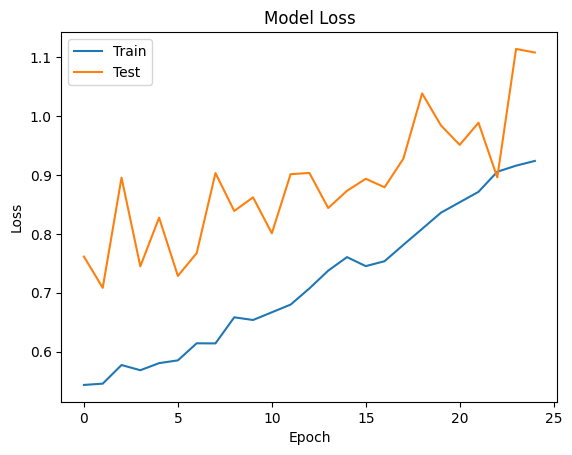

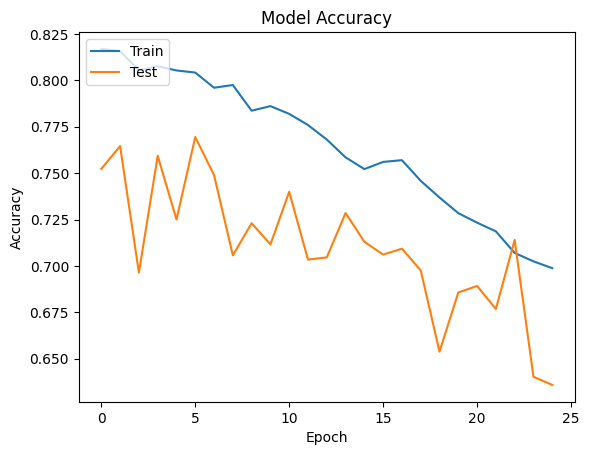

In [3]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Visualize Loss and Accuracy
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
